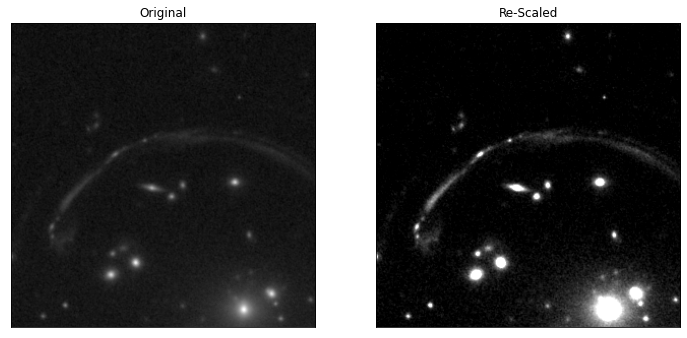

Min: 0.3706537187099457
Max: 1.0270899832248672


In [4]:
"""File Name of Image we want to look at"""
FILE_NAME = "lens"

from astropy.io import fits
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm, PowerNorm
from astropy.utils.data import get_pkg_data_filename
from astropy.nddata.utils import Cutout2D
import numpy as np
from scipy import stats
from scipy.stats import multivariate_normal
import pickle
plt.rcParams["figure.figsize"] = (8,8)

image_file = get_pkg_data_filename('images/{}.fits'.format(FILE_NAME))
image_data = fits.getdata(image_file, ext=1)
length, width = image_data.shape
position = (length/2+100, width/2+300)

"""Size of cutout from center of image"""
# SIZE = int((length + width)/3)
SIZE = 300

image = Cutout2D(image_data, position=position, size=SIZE).data

fig, axs = plt.subplots(1,2, figsize=(12,8))
axs[0].imshow(image, cmap="gray", norm=LogNorm())
axs[0].set_title("Original")
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].invert_yaxis()

test_x, test_y = np.where(image > 0)
values = image[test_x, test_y]
min_pixel_value = np.quantile(values, .5)
max_pixel_value = np.quantile(values, .99)

# # # Set all pixels below min to 1e-10 for log scaling purposes
image[np.where(image < min_pixel_value)] = min_pixel_value
image[np.where(image > max_pixel_value)] = max_pixel_value

axs[1].imshow(image, cmap="gray", norm=PowerNorm(gamma=1))
# axs[1].imshow(image, cmap="gray", norm=LogNorm())
axs[1].set_title("Re-Scaled")
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].invert_yaxis()

plt.show()

print("Min: {}\nMax: {}".format(min_pixel_value, max_pixel_value))


In [5]:
H = 50

x_len, y_len = image.shape
x, y = np.linspace(0, x_len, x_len, dtype=int), np.linspace(0, y_len, y_len, dtype=int)

light_x, light_y = np.where(image > min_pixel_value)
light_pixels = list(zip(light_x, light_y))

pos = np.array(np.meshgrid(x, y)).T.reshape(-1,2)

kde = np.zeros((x_len, y_len)) + 1e-100

for (i,j) in light_pixels:
    kde = np.add(kde, multivariate_normal(mean=[i,j], cov=[[H,0],[0,H]], allow_singular=True).pdf(pos).reshape(x_len, y_len)*image[i-1][j-1])


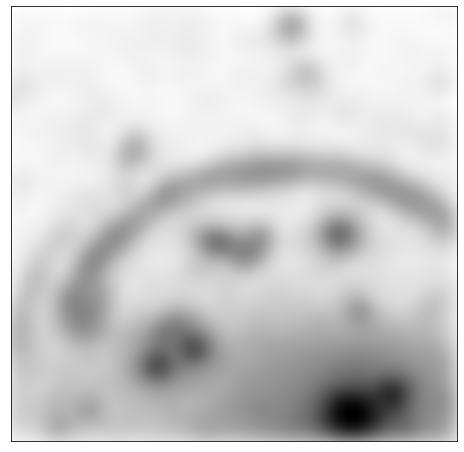

In [6]:
plt.contourf(x, y, kde, cmap="gray_r", levels=1000, norm=PowerNorm(gamma=1))
plt.xticks([])
plt.yticks([])
# plt.gca().invert_yaxis()
plt.show()